In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import optimizers
import tensorflow.keras.backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score

%matplotlib inline

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
X_train.min(), X_train.max()

(0, 255)

In [7]:
img = X_train[0]

In [9]:
img[:3]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]], dtype=uint8)

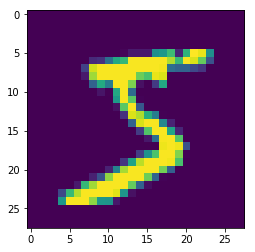

In [11]:
plt.imshow(img);

In [15]:
X_train = X_train.reshape(60_000, 28 * 28)
X_test = X_test.reshape(10_000, 28 * 28)
scalar = MinMaxScaler().fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

/Users/chyld/.conda/envs/py37/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [16]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [18]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [19]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [24]:
model = Sequential()
model.add(Dense(units=2048, activation='relu', input_shape=(784,), name='L1'))
model.add(Dense(units=512, activation='relu', name='L2'))
model.add(Dense(units=10, activation='softmax', name='Out'))

opt = optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['categorical_accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
L1 (Dense)                   (None, 2048)              1607680   
_________________________________________________________________
L2 (Dense)                   (None, 512)               1049088   
_________________________________________________________________
Out (Dense)                  (None, 10)                5130      
Total params: 2,661,898
Trainable params: 2,661,898
Non-trainable params: 0
_________________________________________________________________


In [25]:
history = model.fit(X_train, y_train, epochs=10, batch_size=25, verbose=2, validation_split=0.3, shuffle=True)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 - 17s - loss: 0.2062 - categorical_accuracy: 0.9372 - val_loss: 0.1068 - val_categorical_accuracy: 0.9692
Epoch 2/10
42000/42000 - 17s - loss: 0.0912 - categorical_accuracy: 0.9719 - val_loss: 0.1057 - val_categorical_accuracy: 0.9700
Epoch 3/10
42000/42000 - 17s - loss: 0.0626 - categorical_accuracy: 0.9807 - val_loss: 0.1000 - val_categorical_accuracy: 0.9721
Epoch 4/10
42000/42000 - 17s - loss: 0.0485 - categorical_accuracy: 0.9844 - val_loss: 0.0993 - val_categorical_accuracy: 0.9756
Epoch 5/10
42000/42000 - 17s - loss: 0.0398 - categorical_accuracy: 0.9873 - val_loss: 0.1346 - val_categorical_accuracy: 0.9696
Epoch 6/10
42000/42000 - 17s - loss: 0.0340 - categorical_accuracy: 0.9895 - val_loss: 0.1102 - val_categorical_accuracy: 0.9747
Epoch 7/10
42000/42000 - 17s - loss: 0.0262 - categorical_accuracy: 0.9923 - val_loss: 0.1225 - val_categorical_accuracy: 0.9744
Epoch 8/10
42000/42000 - 17s - loss: 0.0268 - c

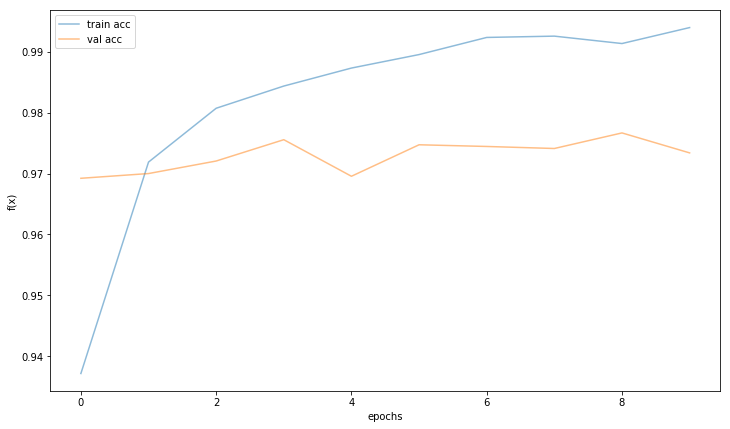

In [26]:
plt.figure(figsize=(12, 7))
plt.plot(history.epoch, history.history['categorical_accuracy'], alpha=0.5, label='train acc')
plt.plot(history.epoch, history.history['val_categorical_accuracy'], alpha=0.5, label='val acc')
plt.xlabel('epochs')
plt.ylabel('f(x)')

plt.legend()
plt.show()